## Exploratory Analysis of dataset derived from Road Accidents STATS19 dataset

<font color="orange">Approach:     
1) Wrangled data for analysis – Merged datasets, removed redundant/repeated variables, imputed with mean/median/mode, transformed categorical variables to numeric data, converted to tall data format     
2) Assessed distribution of data – Bar chart, line graphs, scatter plots, Q-Q plots    
3) Observed trends in data – Line graphs, histogram      
4) Examined relationship between variables – Correlation matrix, Test of independence with ANOVA</font>

#### Load packages

In [1]:
import csv
import os
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from pandas import ExcelWriter
from pandas import ExcelFile
from sklearn.preprocessing import LabelEncoder
import warnings
import pygeohash as pgh
from sklearn.cluster import KMeans
import matplotlib.cm as cm
from geopy.distance import great_circle
from geopy.distance import vincenty
from datetime import datetime
import seaborn as sns
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
import scipy.stats as stats
warnings.filterwarnings('ignore')
%matplotlib inline
get_ipython().magic('matplotlib inline')
matplotlib.rcParams.update({'font.size': 12})
matplotlib.rc('xtick', labelsize=8) 
matplotlib.rc('ytick', labelsize=8)
np.random.seed(10)
%load_ext rpy2.ipython
output_notebook()

Loading BokehJS ...

#### Environment setting

In [2]:
startTime = datetime.now()
wd = "C://MEJ//Interviews//Sky//Data//"
os.chdir(wd)
del wd

#### Load data

In [3]:
csvData = pd.read_csv("Exploratory2005_2015.csv")
print(list(csvData.columns))

['Unnamed: 0', 'Vehicle_Reference', 'Total Casualities', 'Fatal', 'Serious', 'Slight', 'Pedestrian_Count', 'Vehicle_Type', 'Towing_and_Articulation', 'Vehicle_Manoeuvre', 'Vehicle_Location-Restricted_Lane', 'Junction_Location', 'Skidding_and_Overturning', 'Hit_Object_in_Carriageway', 'Vehicle_Leaving_Carriageway', 'Hit_Object_off_Carriageway', '1st_Point_of_Impact', 'Vehicle_Left_Hand_Drive', 'Journey_Purpose_of_Driver', 'Sex_of_Driver', 'Age_of_Driver', 'Age_Band_of_Driver', 'Accident_Severity', 'Number_of_Vehicles', 'Number_of_Casualties', 'Day_of_Week', '1st_Road_Class', '1st_Road_Number', 'Road_Type', 'Speed_limit', 'Junction_Detail', 'Pedestrian_Crossing-Human_Control', 'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions', 'Weather_Conditions', 'Road_Surface_Conditions', 'Special_Conditions_at_Site', 'Carriageway_Hazards', 'Urban_or_Rural_Area', 'LSOA_of_Accident_Location', 'circleDistLL', 'Month', 'Year', 'HourSlot', 'IntensityLabel']


<font color="magenta">NOTE: Not all variables are included for analysis in this notebook</font>

### Data distribution

In [4]:
#sns.pairplot(csvData)
#pd.scatter_matrix(csvData, alpha = 0.3, figsize = (20,20), diagonal = 'kde')

#### Normality test with Q-Q plot

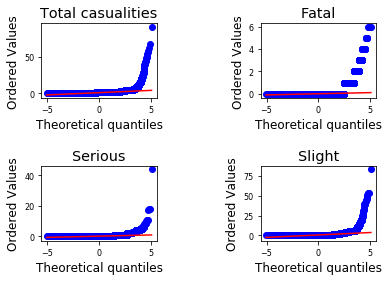

In [5]:
fig = plt.figure()
ax = fig.add_subplot(221)
stats.probplot(csvData['Total Casualities'], dist="norm", plot=plt)
ax.set_title("Total casualities")
ax = fig.add_subplot(222)
stats.probplot(csvData['Fatal'], dist="norm", plot=plt)
ax.set_title("Fatal")
ax = fig.add_subplot(223)
stats.probplot(csvData['Serious'], dist="norm", plot=plt)
ax.set_title("Serious")
ax = fig.add_subplot(224)
stats.probplot(csvData['Slight'], dist="norm", plot=plt)
ax.set_title("Slight")
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.9, hspace=0.9)
plt.show()

#### Plotting of a single attribute

##### Vehicle related attributes

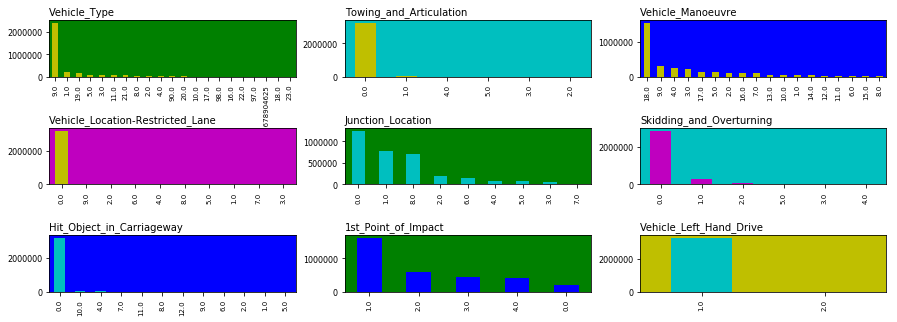

In [6]:
plt.figure(figsize=(15,5))
plt.subplot(331,facecolor='g')
pd.value_counts(csvData['Vehicle_Type']).plot.bar(color='y')#Attribute on x-axis
plt.title('Vehicle_Type',loc='left',fontsize=10)
plt.xticks(fontsize=7)
plt.subplot(332,facecolor='c')
pd.value_counts(csvData['Towing_and_Articulation']).plot.bar(color='y')#Attribute on x-axis
plt.title('Towing_and_Articulation',loc='left',fontsize=10)
plt.xticks(fontsize=7)
plt.subplot(333,facecolor='b')
pd.value_counts(csvData['Vehicle_Manoeuvre']).plot.bar(color='y')#Attribute on x-axis
plt.title('Vehicle_Manoeuvre',loc='left',fontsize=10)
plt.xticks(fontsize=7)
plt.subplot(334,facecolor='m')
pd.value_counts(csvData['Vehicle_Location-Restricted_Lane']).plot.bar(color='y')#Attribute on x-axis
plt.title('Vehicle_Location-Restricted_Lane',loc='left',fontsize=10)
plt.xticks(fontsize=7)
plt.subplot(335,facecolor='g')
pd.value_counts(csvData['Junction_Location']).plot.bar(color='c')#Attribute on x-axis
plt.title('Junction_Location',loc='left',fontsize=10)
plt.xticks(fontsize=7)
plt.subplot(336,facecolor='c')
pd.value_counts(csvData['Skidding_and_Overturning']).plot.bar(color='m')#Attribute on x-axis
plt.title('Skidding_and_Overturning',loc='left',fontsize=10)
plt.xticks(fontsize=7)
plt.subplot(337,facecolor='b')
pd.value_counts(csvData['Hit_Object_in_Carriageway']).plot.bar(color='c')#Attribute on x-axis
plt.title('Hit_Object_in_Carriageway',loc='left',fontsize=10)
plt.xticks(fontsize=7)
plt.subplot(338,facecolor='g')
pd.value_counts(csvData['1st_Point_of_Impact']).plot.bar(color='b')#Attribute on x-axis
plt.title('1st_Point_of_Impact',loc='left',fontsize=10)
plt.xticks(fontsize=7)
plt.subplot(339,facecolor='y')
pd.value_counts(csvData['Vehicle_Left_Hand_Drive']).plot.bar(color='c')#Attribute on x-axis
plt.title('Vehicle_Left_Hand_Drive',loc='left',fontsize=10)
plt.xticks(fontsize=7)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.9)
plt.show()

##### Driver related attributes

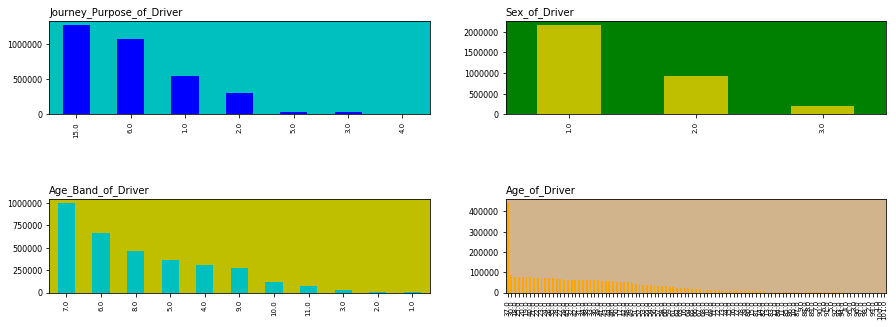

In [7]:
plt.figure(figsize=(15,5))
plt.subplot(221,facecolor='c')
pd.value_counts(csvData['Journey_Purpose_of_Driver']).plot.bar(color='b')#Attribute on x-axis
plt.title('Journey_Purpose_of_Driver',loc='left',fontsize=10)
plt.xticks(fontsize=7)
plt.subplot(222,facecolor='g')
pd.value_counts(csvData['Sex_of_Driver']).plot.bar(color='y')#Attribute on x-axis
plt.title('Sex_of_Driver',loc='left',fontsize=10)
plt.xticks(fontsize=7)
plt.subplot(223,facecolor='y')
pd.value_counts(csvData['Age_Band_of_Driver']).plot.bar(color='c')#Attribute on x-axis
plt.title('Age_Band_of_Driver',loc='left',fontsize=10)
plt.xticks(fontsize=7)
plt.subplot(224,facecolor='tan')
pd.value_counts(csvData['Age_of_Driver']).plot.bar(color='orange')#Attribute on x-axis
plt.title('Age_of_Driver',loc='left',fontsize=10)
plt.xticks(fontsize=7)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.9)
plt.show()

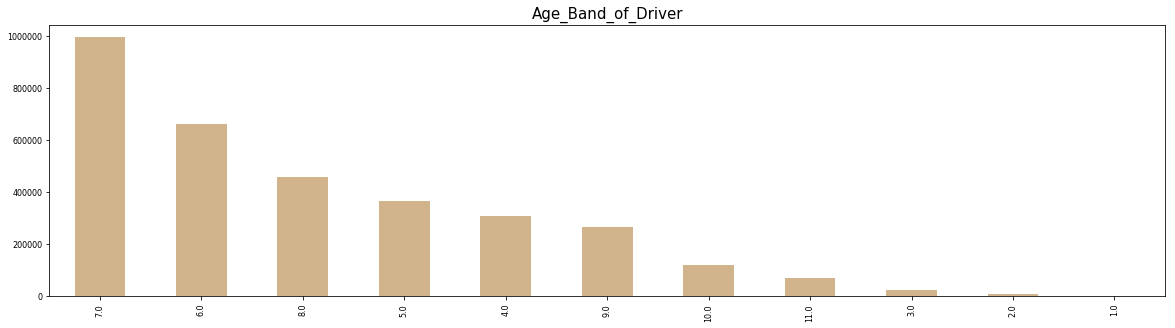

In [8]:
plt.figure(figsize=(20,5))
pd.value_counts(csvData['Age_Band_of_Driver']).plot.bar(color='tan')#Attribute on x-axis
plt.title('Age_Band_of_Driver', fontsize=15)
plt.show()

In [9]:
csvData['Sex_of_Driver'].unique()
genderData = csvData.copy(deep=True)
genderData['Sex_of_Driver'] = genderData['Sex_of_Driver'].apply(lambda x: int(x))
genderData['Sex_of_Driver'].unique()
genderData = csvData[csvData['Sex_of_Driver']!=3]
genderData['Sex_of_Driver'].unique()
genderData['Sex_of_Driver'] = genderData['Sex_of_Driver'].apply(lambda x: int(x))

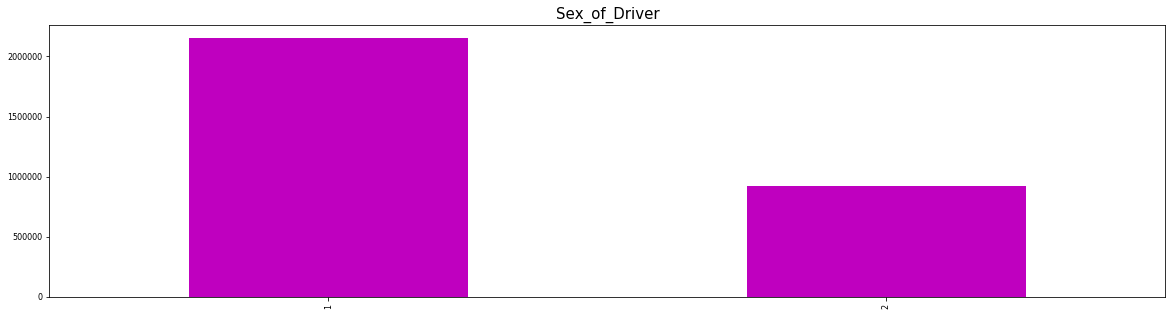

In [10]:
plt.figure(figsize=(20,5))
pd.value_counts(genderData['Sex_of_Driver']).plot.bar(color='m')#Attribute on x-axis
plt.title('Sex_of_Driver', fontsize=15)
plt.show()

##### Pedestrian related attributes

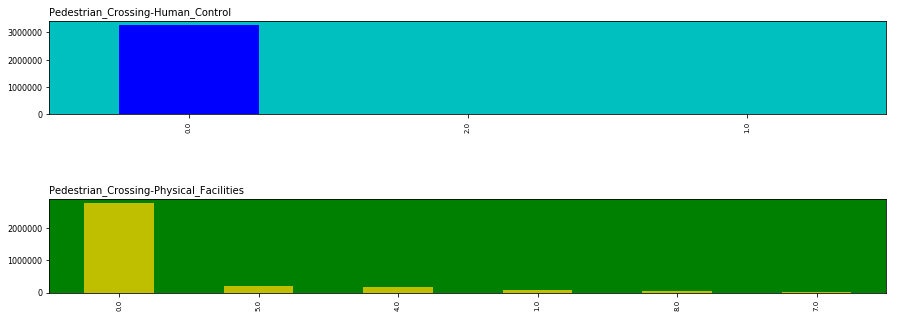

In [11]:
plt.figure(figsize=(15,5))
plt.subplot(211,facecolor='c')
pd.value_counts(csvData['Pedestrian_Crossing-Human_Control']).plot.bar(color='b')#Attribute on x-axis
plt.title('Pedestrian_Crossing-Human_Control',loc='left',fontsize=10)
plt.xticks(fontsize=7)
plt.subplot(212,facecolor='g')
pd.value_counts(csvData['Pedestrian_Crossing-Physical_Facilities']).plot.bar(color='y')#Attribute on x-axis
plt.title('Pedestrian_Crossing-Physical_Facilities',loc='left',fontsize=10)
plt.xticks(fontsize=7)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.9)
plt.show()

##### Road related attributes

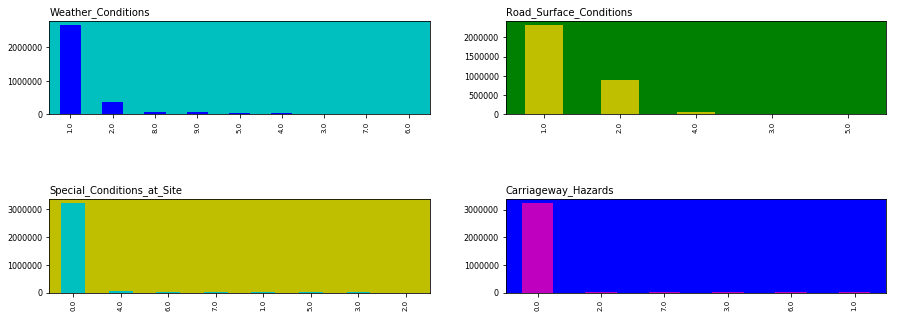

In [12]:
plt.figure(figsize=(15,5))
plt.subplot(221,facecolor='c')
pd.value_counts(csvData['Weather_Conditions']).plot.bar(color='b')#Attribute on x-axis
plt.title('Weather_Conditions',loc='left',fontsize=10)
plt.xticks(fontsize=7)
plt.subplot(222,facecolor='g')
pd.value_counts(csvData['Road_Surface_Conditions']).plot.bar(color='y')#Attribute on x-axis
plt.title('Road_Surface_Conditions',loc='left',fontsize=10)
plt.xticks(fontsize=7)
plt.subplot(223,facecolor='y')
pd.value_counts(csvData['Special_Conditions_at_Site']).plot.bar(color='c')#Attribute on x-axis
plt.title('Special_Conditions_at_Site',loc='left',fontsize=10)
plt.xticks(fontsize=7)
plt.subplot(224,facecolor='b')
pd.value_counts(csvData['Carriageway_Hazards']).plot.bar(color='m')#Attribute on x-axis
plt.title('Carriageway_Hazards',loc='left',fontsize=10)
plt.xticks(fontsize=7)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.9)
plt.show()

##### Accident severity related attributes

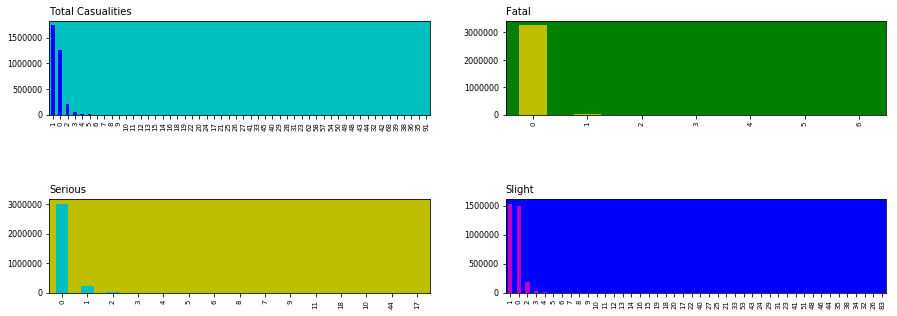

In [13]:
plt.figure(figsize=(15,5))
plt.subplot(221,facecolor='c')
pd.value_counts(csvData['Total Casualities']).plot.bar(color='b')#Attribute on x-axis
plt.title('Total Casualities',loc='left',fontsize=10)
plt.xticks(fontsize=7)
plt.subplot(222,facecolor='g')
pd.value_counts(csvData['Fatal']).plot.bar(color='y')#Attribute on x-axis
plt.title('Fatal',loc='left',fontsize=10)
plt.xticks(fontsize=7)
plt.subplot(223,facecolor='y')
pd.value_counts(csvData['Serious']).plot.bar(color='c')#Attribute on x-axis
plt.title('Serious',loc='left',fontsize=10)
plt.xticks(fontsize=7)
plt.subplot(224,facecolor='b')
pd.value_counts(csvData['Slight']).plot.bar(color='m')#Attribute on x-axis
plt.title('Slight',loc='left',fontsize=10)
plt.xticks(fontsize=7)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.9)
plt.show()

##### Time related attributes

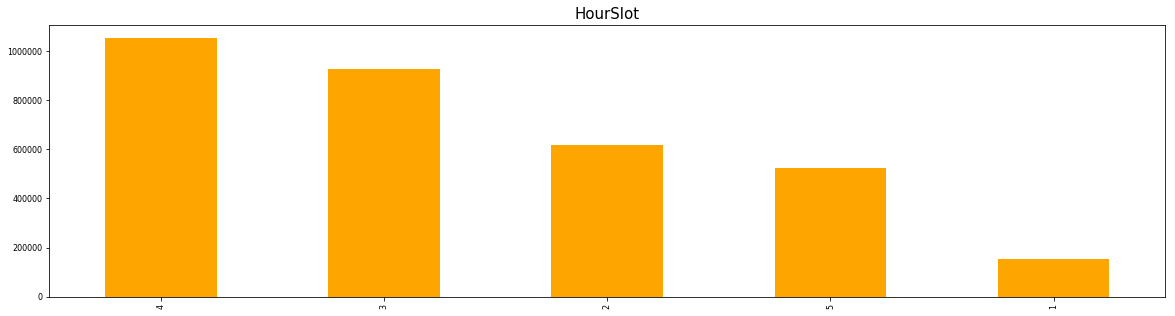

In [14]:
plt.figure(figsize=(20,5))
pd.value_counts(csvData['HourSlot']).plot.bar(color='orange')#Attribute on x-axis
plt.title('HourSlot', fontsize=15)
plt.show()

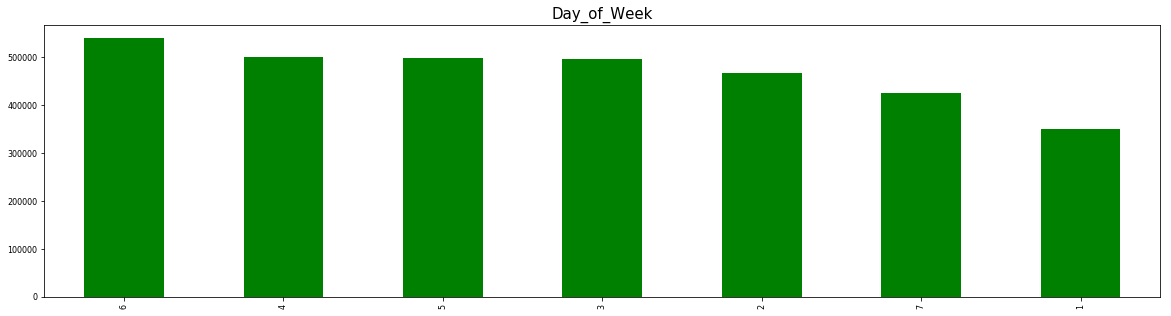

In [15]:
plt.figure(figsize=(20,5))
pd.value_counts(csvData['Day_of_Week']).plot.bar(color='g')#Attribute on x-axis
plt.title('Day_of_Week', fontsize=15)
plt.show()

#### Plotting of multiple variables

##### Casualty by Driver Gender (box plot)

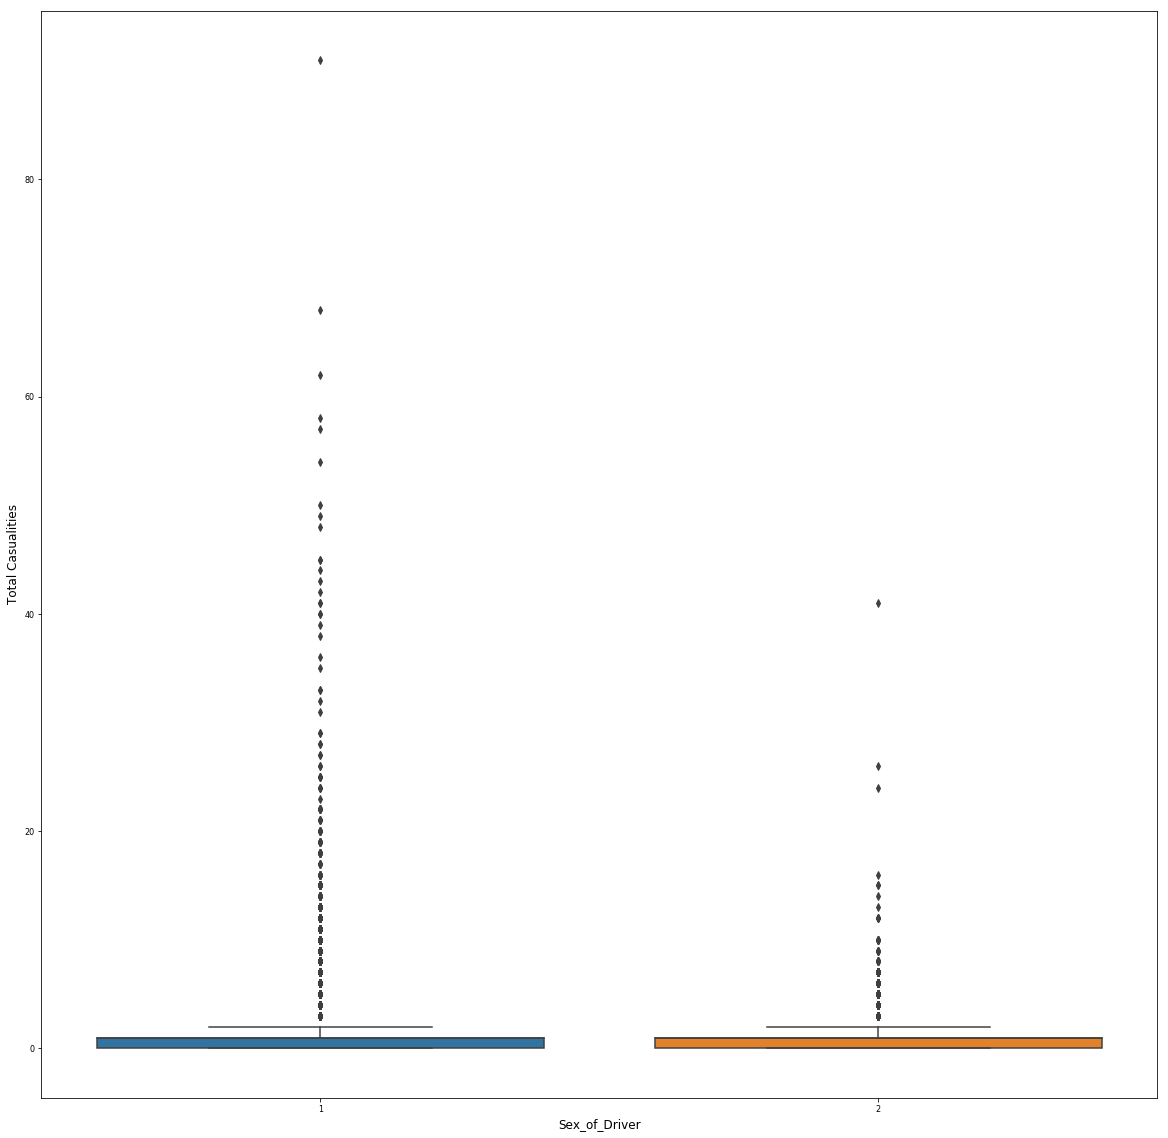

In [16]:
plt.figure(figsize=(20,20))
sns.boxplot( x=genderData["Sex_of_Driver"], y=genderData["Total Casualities"])
del genderData

##### Casualty by Vehicle type

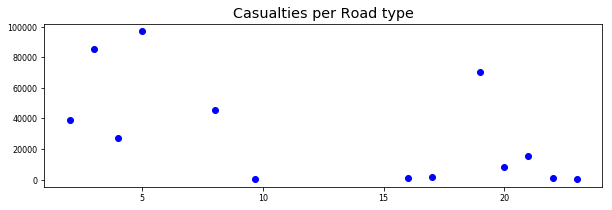

In [17]:
vehicleType = csvData[~csvData['Vehicle_Type'].isin([10,11,18,-1,90,97,98,9,1])]
temp = vehicleType.groupby(['Vehicle_Type']).sum()['Total Casualities']
plt.figure(figsize=(10,3))
plt.grid(False)
plt.scatter(temp.index,temp,c='b')
plt.title('Casualties per Road type')
del vehicleType,temp

##### Casualty by Road type

Text(0.5,1,'Casualties per Road type')

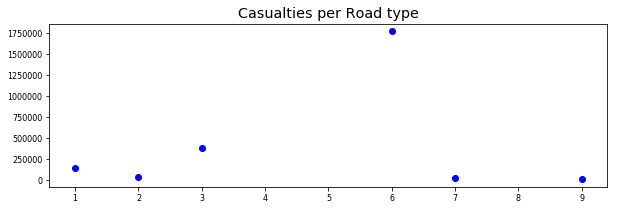

In [18]:
temp = csvData.groupby(['Road_Type']).sum()['Total Casualities']
plt.figure(figsize=(10,3))
plt.grid(False)
plt.scatter(temp.index,temp,c='b')
plt.title('Casualties per Road type')

##### Casualty by Light conditions

Light_Conditions
1.0    1740520
4.0     477707
5.0      10827
6.0     145903
7.0      26775
Name: Total Casualities, dtype: int64

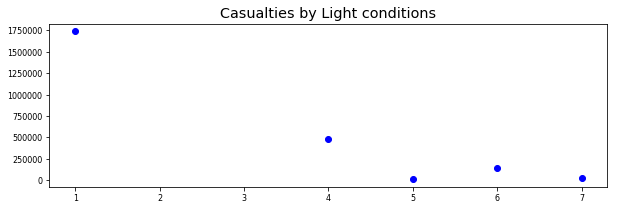

In [19]:
temp = csvData.groupby(['Light_Conditions']).sum()['Total Casualities']
plt.figure(figsize=(10,3))
plt.grid(False)
plt.scatter(temp.index,temp,c='b')
plt.title('Casualties by Light conditions')
temp

##### Casualty by Weather conditions

Text(0.5,1,'Casualties by Weather conditions')

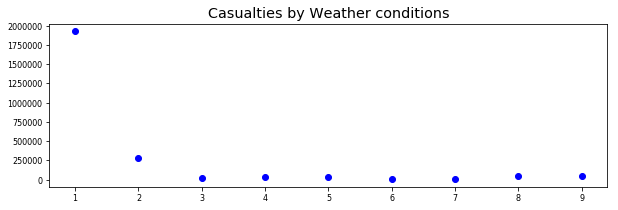

In [20]:
temp = csvData.groupby(['Weather_Conditions']).sum()['Total Casualities']
plt.figure(figsize=(10,3))
plt.grid(False)
plt.scatter(temp.index,temp,c='b')
plt.title('Casualties by Weather conditions')

##### Casaulty by Road speed limit

Text(0.5,1,'Casualties by Speed limit')

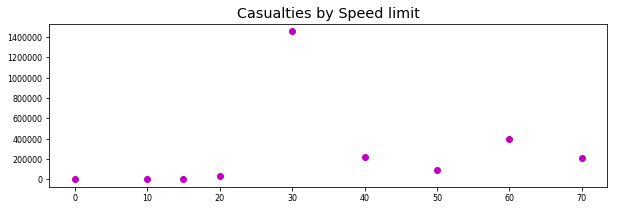

In [21]:
temp = csvData.groupby(['Speed_limit']).sum()['Total Casualities']
plt.figure(figsize=(10,3))
plt.grid(False)
plt.scatter(temp.index,temp,c='m')
plt.title('Casualties by Speed limit')

<font color="blue">Delving into each category of accident severity - Fatal, Serious, Slight - by Speed limit</font>

Text(0.5,1,'Fatalities by Speed limit')

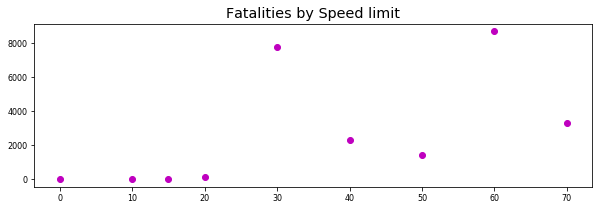

In [22]:
temp = csvData.groupby(['Speed_limit']).sum()['Fatal']
plt.figure(figsize=(10,3))
plt.grid(False)
plt.scatter(temp.index,temp,c='m')
plt.title('Fatalities by Speed limit')

Text(0.5,1,'Casualties by Speed limit')

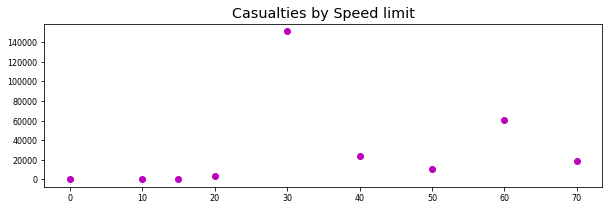

In [23]:
temp = csvData.groupby(['Speed_limit']).sum()['Serious']
plt.figure(figsize=(10,3))
plt.grid(False)
plt.scatter(temp.index,temp,c='m')
plt.title('Casualties by Speed limit')

Text(0.5,1,'Casualties by Speed limit')

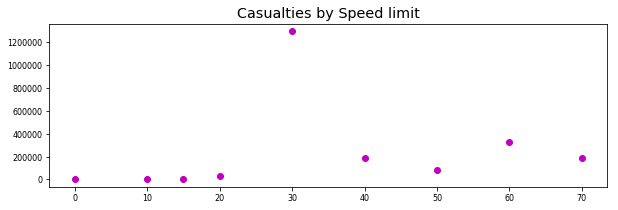

In [24]:
temp = csvData.groupby(['Speed_limit']).sum()['Slight']
plt.figure(figsize=(10,3))
plt.grid(False)
plt.scatter(temp.index,temp,c='m')
plt.title('Casualties by Speed limit')

##### Casualty by Journey purpose

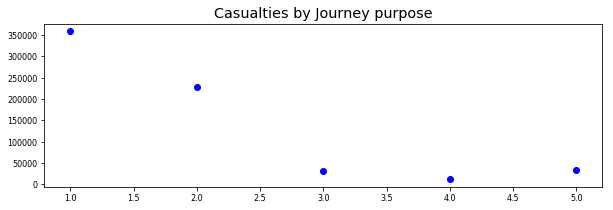

In [25]:
journeyPurpose = csvData[csvData['Journey_Purpose_of_Driver']<6]
temp = journeyPurpose.groupby(['Journey_Purpose_of_Driver']).sum()['Total Casualities']
plt.figure(figsize=(10,3))
plt.grid(False)
plt.scatter(temp.index,temp,c='b')
plt.title('Casualties by Journey purpose')
del temp, journeyPurpose

##### Casualty by Month

Text(0.5,1,'Casualties by Month')

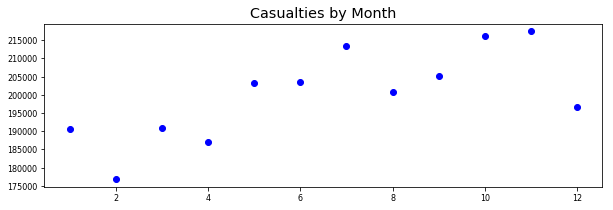

In [26]:
temp = csvData.groupby(['Month']).sum()['Total Casualities']
plt.figure(figsize=(10,3))
plt.grid(False)
plt.scatter(temp.index,temp,c='b')
plt.title('Casualties by Month')

##### Casualty by Year

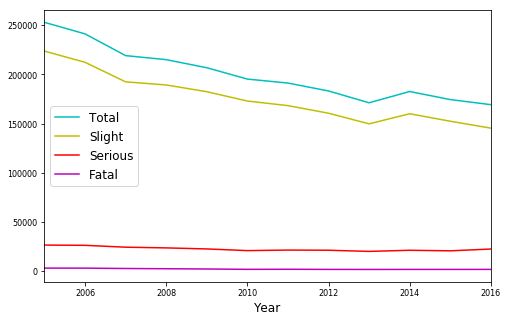

In [27]:
fig, ax = plt.subplots(figsize=(8,5))
csvData.groupby(['Year']).sum()['Total Casualities'].plot(ax=ax,c='c',label='Total')
csvData.groupby(['Year']).sum()['Slight'].plot(ax=ax,c='y',label='Slight')
csvData.groupby(['Year']).sum()['Serious'].plot(ax=ax,c='r',label='Serious')
csvData.groupby(['Year']).sum()['Fatal'].plot(ax=ax,c='m',label='Fatal')
plt.legend()

<font color="blue">Delving into each category of accident severity - Fatal, Serious, Slight - per Month</font>

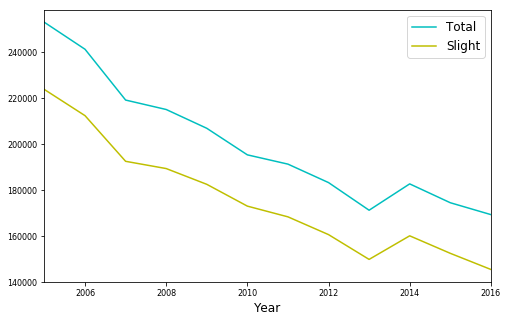

In [28]:
fig, ax = plt.subplots(figsize=(8,5))
csvData.groupby(['Year']).sum()['Total Casualities'].plot(ax=ax,c='c',label='Total')
csvData.groupby(['Year']).sum()['Slight'].plot(ax=ax,c='y',label='Slight')
plt.legend()

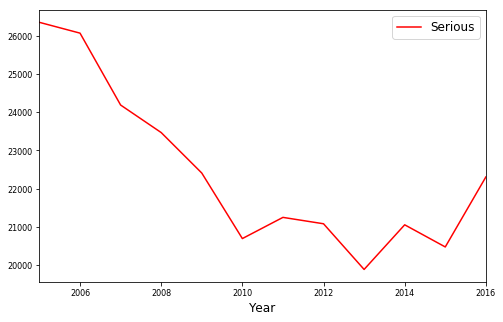

In [29]:
fig, ax = plt.subplots(figsize=(8,5))
csvData.groupby(['Year']).sum()['Serious'].plot(ax=ax,c='r',label='Serious')
plt.legend()

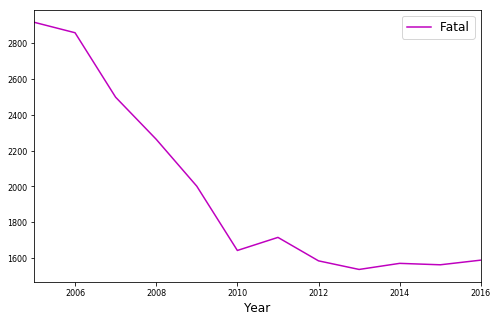

In [30]:
fig, ax = plt.subplots(figsize=(8,5))
csvData.groupby(['Year']).sum()['Fatal'].plot(ax=ax,c='m',label='Fatal')
plt.legend()

<font color="blue">Stacked bar graph for casualty over the years</font>

In [31]:
years = csvData['Year'].unique()
fatal = csvData['Fatal'].groupby(csvData['Year']).sum()
serious = csvData['Serious'].groupby(csvData['Year']).sum()
slight = csvData['Slight'].groupby(csvData['Year']).sum()
total = csvData['Total Casualities'].groupby(csvData['Year']).sum()
print('Years: ', years)

Years:  [2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016]


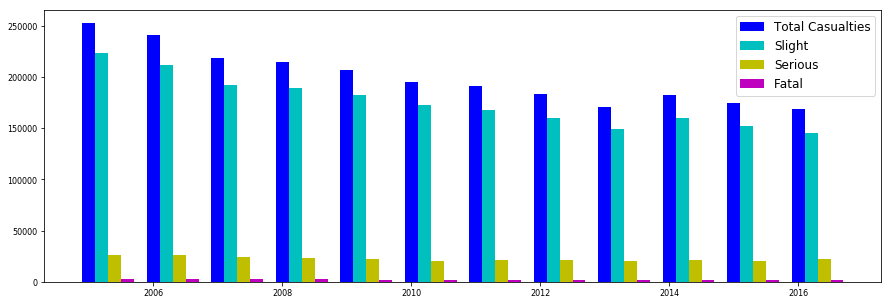

In [32]:
plt.figure(figsize=(15,5))
ax = plt.subplot(111)
ax.bar(years, total,width=0.2,color='b',align='center',label='Total Casualties')
ax.bar(years+0.2, slight,width=0.2,color='c',align='center',label='Slight')
ax.bar(years+0.4, serious,width=0.2,color='y',align='center',label='Serious')
ax.bar(years+0.6, fatal,width=0.2,color='m',align='center',label='Fatal')
#f = ax.plot(years, fatal, 'ms-')
#plt.legend(f)
plt.legend()
plt.show()

##### Casualty by day of week

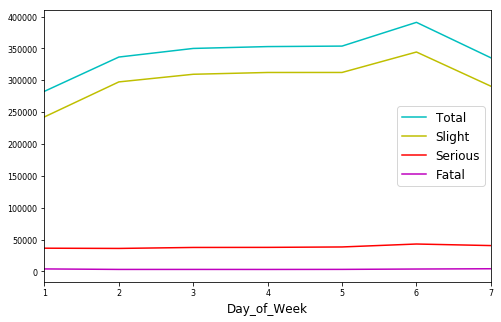

In [33]:
fig, ax = plt.subplots(figsize=(8,5))
csvData.groupby(['Day_of_Week']).sum()['Total Casualities'].plot(ax=ax,c='c',label='Total')
csvData.groupby(['Day_of_Week']).sum()['Slight'].plot(ax=ax,c='y',label='Slight')
csvData.groupby(['Day_of_Week']).sum()['Serious'].plot(ax=ax,c='r',label='Serious')
csvData.groupby(['Day_of_Week']).sum()['Fatal'].plot(ax=ax,c='m',label='Fatal')
plt.legend()

<font color="blue">Delving into each category of accident severity - Fatal, Serious, Slight - by Day of Week</font>

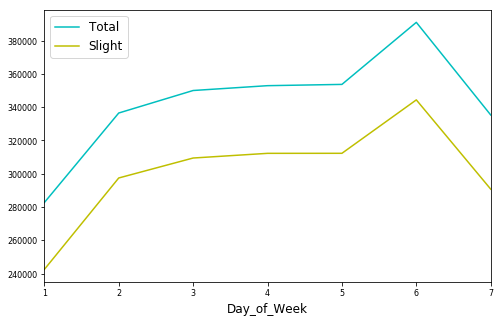

In [34]:
fig, ax = plt.subplots(figsize=(8,5))
csvData.groupby(['Day_of_Week']).sum()['Total Casualities'].plot(ax=ax,c='c',label='Total')
csvData.groupby(['Day_of_Week']).sum()['Slight'].plot(ax=ax,c='y',label='Slight')
plt.legend()

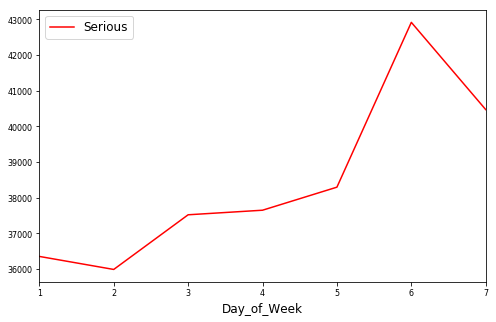

In [35]:
fig, ax = plt.subplots(figsize=(8,5))
csvData.groupby(['Day_of_Week']).sum()['Serious'].plot(ax=ax,c='r',label='Serious')
plt.legend()

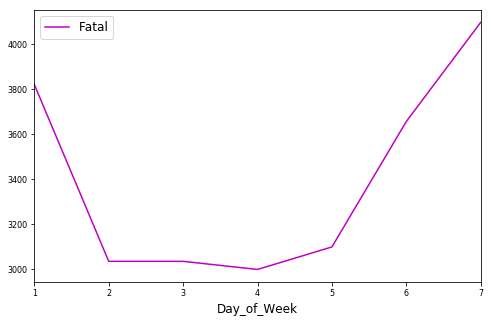

In [36]:
fig, ax = plt.subplots(figsize=(8,5))
csvData.groupby(['Day_of_Week']).sum()['Fatal'].plot(ax=ax,c='m',label='Fatal')
plt.legend()

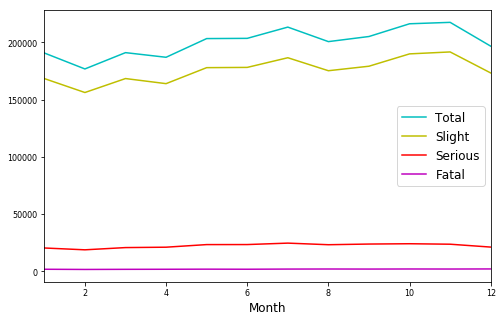

In [37]:
fig, ax = plt.subplots(figsize=(8,5))
csvData.groupby(['Month']).sum()['Total Casualities'].plot(ax=ax,c='c',label='Total')
csvData.groupby(['Month']).sum()['Slight'].plot(ax=ax,c='y',label='Slight')
csvData.groupby(['Month']).sum()['Serious'].plot(ax=ax,c='r',label='Serious')
csvData.groupby(['Month']).sum()['Fatal'].plot(ax=ax,c='m',label='Fatal')
plt.legend()

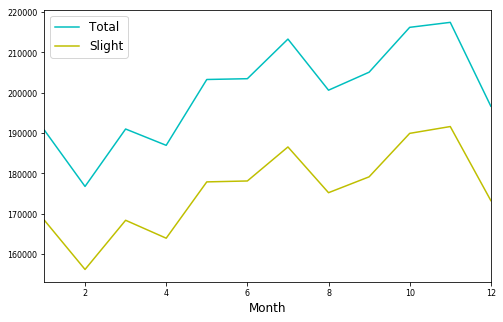

In [38]:
fig, ax = plt.subplots(figsize=(8,5))
csvData.groupby(['Month']).sum()['Total Casualities'].plot(ax=ax,c='c',label='Total')
csvData.groupby(['Month']).sum()['Slight'].plot(ax=ax,c='y',label='Slight')
plt.legend()

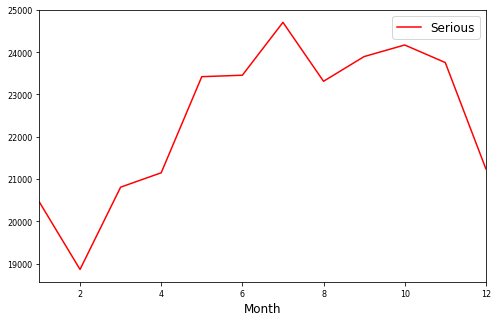

In [39]:
fig, ax = plt.subplots(figsize=(8,5))
csvData.groupby(['Month']).sum()['Serious'].plot(ax=ax,c='r',label='Serious')
plt.legend()

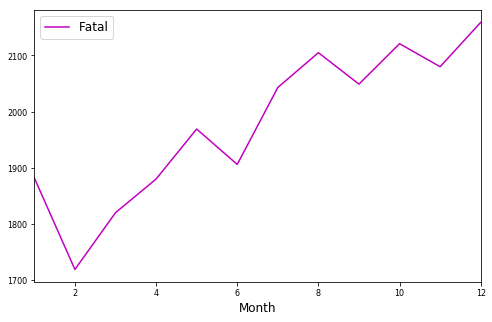

In [40]:
fig, ax = plt.subplots(figsize=(8,5))
csvData.groupby(['Month']).sum()['Fatal'].plot(ax=ax,c='m',label='Fatal')
plt.legend()

### Variable Association

#### Correlation

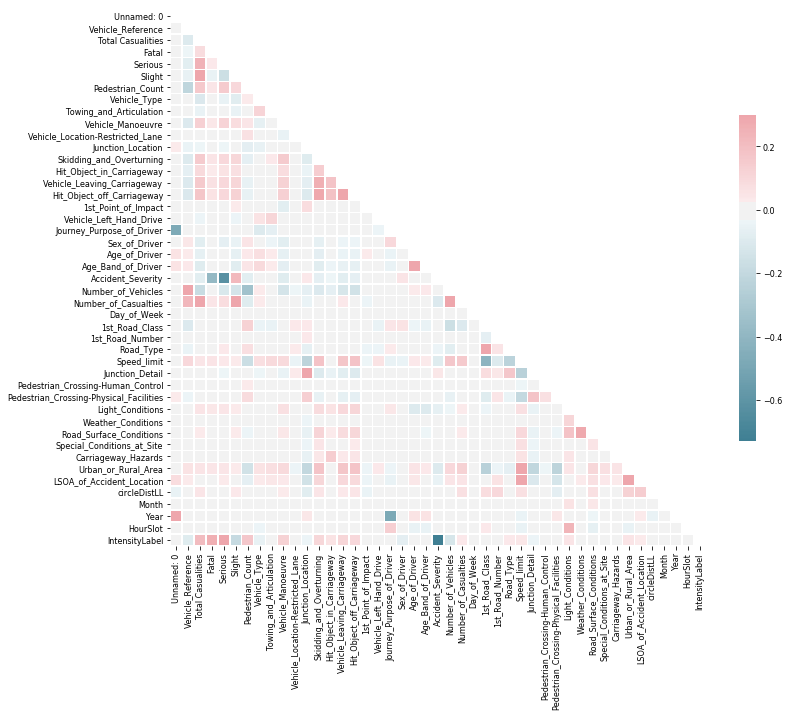

In [41]:
plt.figure(figsize=(12,12))
corr = csvData.corr()
cmap = sns.diverging_palette(220, 10, as_cmap=True)
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5})

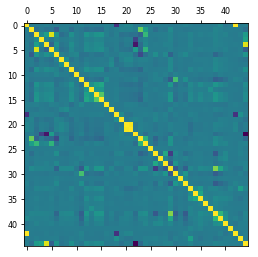

In [42]:
plt.figure(figsize=(20,20))
dataCorrelation = pd.DataFrame(csvData.corr())
plt.matshow(csvData.corr())

In [43]:
def colorPandasDF_redOrGreen(val):
    color = 'red' if val < 0.5 else 'green'
    return 'color: %s' % color
dataCorrelation.style.applymap(colorPandasDF_redOrGreen)

<font color='red'>There isn't any correlation between Casualty variables to provide intuitive inference. </font>

#### One-way ANOVA

##### Road speed limit

In [44]:
csvData["Speed_limit"].unique()

array([ 30.,  40.,  50.,  20.,  60.,  70.,  10.,  15.,   0.])

In [45]:
speed10 = csvData[csvData["Speed_limit"] == 30.0]["Total Casualities"]
speed30 = csvData[csvData["Speed_limit"] == 30.0]["Total Casualities"] 
speed40 = csvData[csvData["Speed_limit"] == 30.0]["Total Casualities"]
speed60 = csvData[csvData["Speed_limit"] == 60.0]["Total Casualities"]
speed70 = csvData[csvData["Speed_limit"] == 70.0]["Total Casualities"]

In [46]:
_, p_val = stats.f_oneway(speed10, speed30, speed40, speed60, speed70)
print('P-value = ',p_val)

P-value =  0.0


<font color="blue">If p-value > 0.05, it may be claimed with high confidence that mean of the above 5 groups are not significantly different.</font><font color="green"> Here p-value = 0 and therefore, null hypothesis is rejected and we may to accept that the groups are different. It may however be noted that With large sample size, any differences can be significant enough leading to a very small P-value. So, the test is repeated with a smaller sample size.</font><font color="green">Going forward, smaller dataset will be used to quantify variable association with one-way ANOVA</font>

In [47]:
csvData2016 = pd.read_csv("Exploratory2016.csv")
#print(list(csvData2016.columns))
speed10 = csvData2016[csvData2016["Speed_limit"] == 30.0]["Total Casualities"]
speed30 = csvData2016[csvData2016["Speed_limit"] == 30.0]["Total Casualities"]
speed40 = csvData2016[csvData2016["Speed_limit"] == 30.0]["Total Casualities"]
speed60 = csvData2016[csvData2016["Speed_limit"] == 60.0]["Total Casualities"]
speed70 = csvData2016[csvData2016["Speed_limit"] == 70.0]["Total Casualities"]
_, p_val = stats.f_oneway(speed10, speed30, speed40, speed60, speed70)
print('P-value for Speed limit = ',p_val)
del speed10, speed30, speed40, speed60, speed70

P-value for Speed limit =  1.7061709965e-210


<font color="blue">Here again, p-value is too small leading us to reject the null hypothesis again.</font> <font color="green">So, the groups appear to be different and it may be confidently said that the accidents are considerably different in the various speed limits.</font>

##### Driver Gender

In [48]:
csvData2016["Sex_of_Driver"].unique()

array([ 1.,  2.,  3.])

In [49]:
male = csvData2016[csvData2016["Sex_of_Driver"] == 1.0]["Total Casualities"]
female = csvData2016[csvData2016["Sex_of_Driver"] == 2.0]["Total Casualities"]
_, p_val = stats.f_oneway(male,female)
print('P-value for driver gender = ',p_val)
del male,female

P-value for driver gender =  6.92798971732e-132


<font color="green">As the p-value is > 0.05 or 0.1, we cannot reject the null hypothesis of same number of casualty caused by the two genders.</font>

##### Road type

In [50]:
csvData2016["1st_Road_Class"].unique()

array([3, 5, 4, 6, 1, 2], dtype=int64)

In [51]:
road1 = csvData2016[csvData2016["1st_Road_Class"] == 1]["Total Casualities"]
road2 = csvData2016[csvData2016["1st_Road_Class"] == 2]["Total Casualities"]
road3 = csvData2016[csvData2016["1st_Road_Class"] == 3]["Total Casualities"]
road4 = csvData2016[csvData2016["1st_Road_Class"] == 4]["Total Casualities"]
road5 = csvData2016[csvData2016["1st_Road_Class"] == 5]["Total Casualities"]
_, p_val = stats.f_oneway(road1, road2, road3, road4, road5)
print('P-value for driver gender = ',p_val)
del road1, road2, road3, road4, road5

P-value for driver gender =  1.8790888911e-09


<font color="green">Differnt road categories i.e. Motorways, A/B/C roads etc are different in terms of casualty count</font>

##### Weather condition

In [52]:
csvData2016["Weather_Conditions"].unique()

array([ 1.,  2.,  7.,  8.,  9.,  4.,  5.,  3.,  6.])

In [53]:
dry = csvData2016[csvData2016["Weather_Conditions"] == 1.0]["Total Casualities"]
rain = csvData2016[csvData2016["Weather_Conditions"] == 2.0]["Total Casualities"]
snow = csvData2016[csvData2016["Weather_Conditions"] == 3.0]["Total Casualities"]
dryNwindy = csvData2016[csvData2016["Weather_Conditions"] == 4.0]["Total Casualities"]
rainNwindy = csvData2016[csvData2016["Weather_Conditions"] == 5.0]["Total Casualities"]
snowNwindy = csvData2016[csvData2016["Weather_Conditions"] == 6.0]["Total Casualities"]
fog = csvData2016[csvData2016["Weather_Conditions"] == 7.0]["Total Casualities"]
_, p_val = stats.f_oneway(dry, rain, snow, dryNwindy, rainNwindy, snowNwindy, fog)
print('P-value for driver gender = ',p_val)
del dry, rain, snow, dryNwindy, rainNwindy, snowNwindy, fog

P-value for driver gender =  3.65628924646e-25


In [54]:
del csvData2016, csvData

#### Class label distribution

In [55]:
classDistribution = csvData['IntensityLabel'].value_counts()
print('Class imbalance:')
print(classDistribution)

Class imbalance:
0    3004246
1     272274
Name: IntensityLabel, dtype: int64


<font color='blue'>Future improvements will include: (1) Spatial auto-correlation with Moran's I test. (2) Multi-dimensional scaling of dataset to assess the distance between various categories of class labels to evaluate further data transformation.(3) Combine with other datasets like traffic volume, population by LSOA etc. to derive better insights and class label.</font>